In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [3]:
df = pd.read_csv("Downloads/Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
import math
                         ## note that log of 0 = negative infinity
N = 10000
d = 10
ads_selected = []

numbers_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):  # first itration of the for loop, looping through all the rows
    ad = 0
    max_upper_bound = 0
    for i in range(0, d): # second for loop, looping through the ads
        if (numbers_of_selections[i] > 0): # if statemnt checking the num of selected > 0
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad] 
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + reward
    



            
            

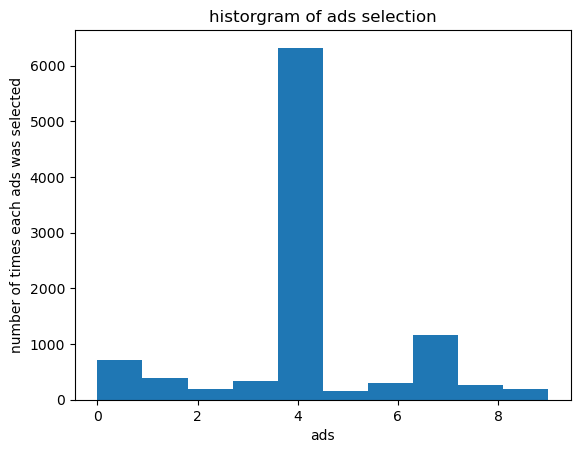

In [5]:
plt.hist(ads_selected)
plt.title("historgram of ads selection")
plt.xlabel("ads")
plt.ylabel("number of times each ads was selected")
plt.show()

In [6]:
#I am a hard working student of the department of maths whom is excited above this field, and also would love to learn, grow and make a living with it. As a student, it is difficult to work and school at the same time and with the current state of things around the world it is only needed for me to learn and get more skill sets for myself, that way I can fit in when the time comes. I have seen the important of data and data analysis in different areas of life and also read online, and I am sure with the help of my foundation in mathematics I will not only have fun with it but I will make a living too.  
# With my retired patients it makes it harder for me to rise the required amount to purchase this course and I will be glad if my request be granted. 

### Thompson sampling algorithm

In [10]:
import random

N = 10000
d = 10
ads_selected = []

numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward ==1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

### plotting the histogram for thompson to check the best ad, and also compair with ucb


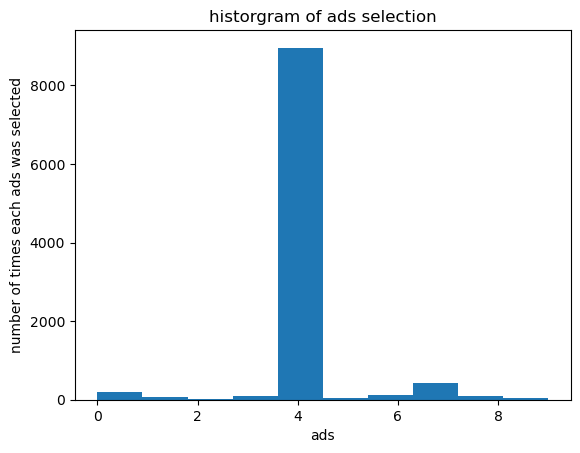

In [12]:
plt.hist(ads_selected)
plt.title("historgram of ads selection")
plt.xlabel("ads")
plt.ylabel("number of times each ads was selected")
plt.show()

#### We can see that the thompson sampling is a better algorithm because it was able to find the best ad more even after reducing the number of rounds 